# Globularna jata M2 i M3 - SDSS i Gaia SQL


Propusnost filtera:
 - <ins>SDSS</ins>: **u**, **g**, **r**, **i**, **z**
 - <ins>Gaia</ins>: **bp** (plava), **g**(crna), **rp**(crvena)


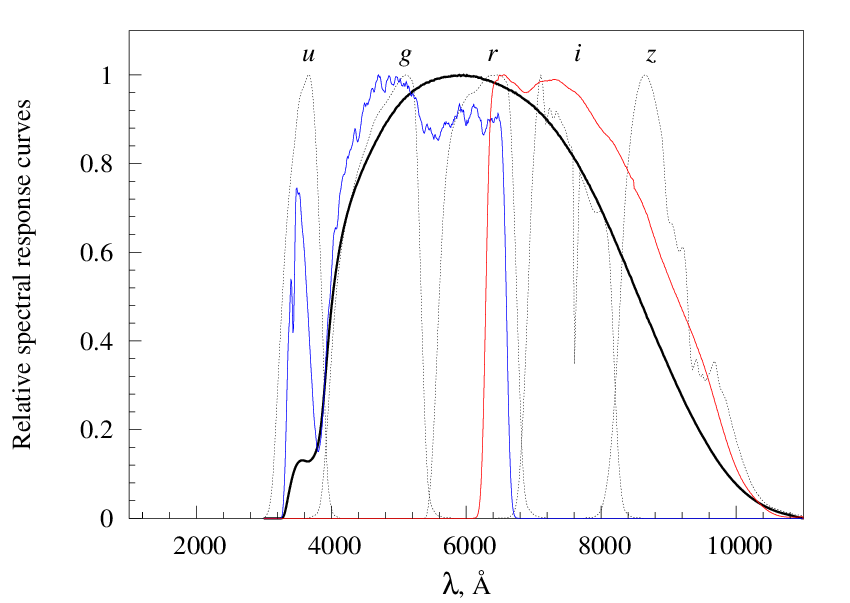


# SDSS

In [5]:
from __future__ import division, print_function, absolute_import, unicode_literals

import numpy as np
import pandas as pd
import astropy.coordinates as coords
import astropy.units as u
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astroquery.gaia import Gaia

%matplotlib inline


In [6]:
SQ_M2 = "SELECT p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z   \
        FROM                                                   \
        photoObj p, dbo.fGetNearbyObjEq(323.365,-0.8221,9) n   \
        WHERE                                                  \
        p.objID = n.objID                                      \
        and p.type = 6                                         "

SQ_M3 = "SELECT p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z  \
        FROM                                                   \
        photoObj p, dbo.fGetNearbyObjEq(205.5484,28.3772,21) n \
        WHERE                                                  \
        p.objID = n.objID                                      \
        and p.type = 6                                         "

In [7]:
Sdf2 = SDSS.query_sql(SQ_M2).to_pandas()
Sdf3 = SDSS.query_sql(SQ_M3).to_pandas()

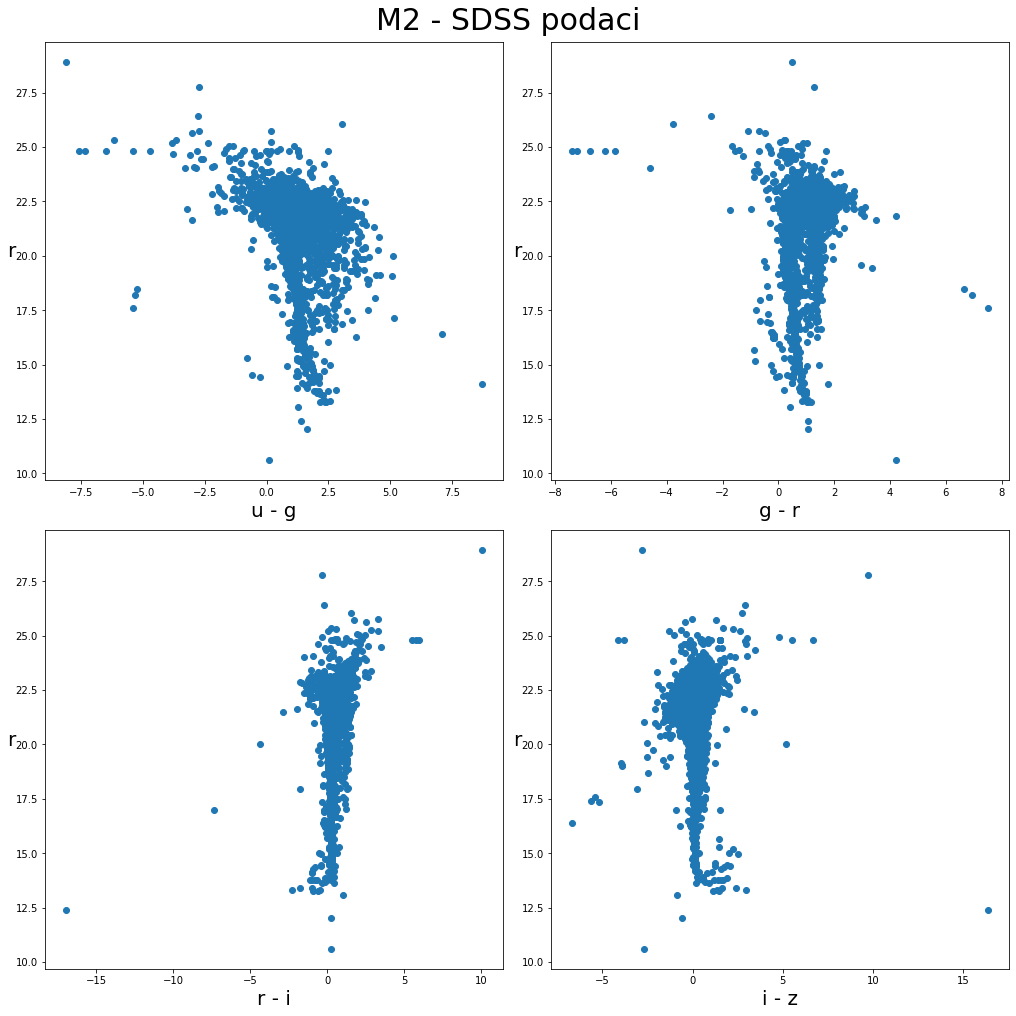

In [39]:
fig = plt.figure(figsize=(14, 14), layout='constrained')
fig.suptitle('M2 - SDSS podaci', fontsize=30)

ax1 = fig.add_subplot(221)
ax1.scatter(Sdf2['u'] - Sdf2['g'], Sdf2['r'])
ax1.set_xlabel('u - g', fontsize=20)
ax1.set_ylabel('r',  fontsize=20, rotation=0)

ax2 = fig.add_subplot(222)
ax2.scatter(Sdf2['g'] - Sdf2['r'], Sdf2['r'])
ax2.set_xlabel('g - r',  fontsize=20)
ax2.set_ylabel('r',  fontsize=20, rotation=0)

ax3 = fig.add_subplot(223)
ax3.scatter(Sdf2['r'] - Sdf2['i'], Sdf2['r'])
ax3.set_xlabel('r - i',  fontsize=20)
ax3.set_ylabel('r',  fontsize=20, rotation=0)

ax4 = fig.add_subplot(224)
ax4.scatter(Sdf2['i'] - Sdf2['z'], Sdf2['r'])
ax4.set_xlabel('i - z',  fontsize=20)
ax4.set_ylabel('r',  fontsize=20, rotation=0)

plt.show()

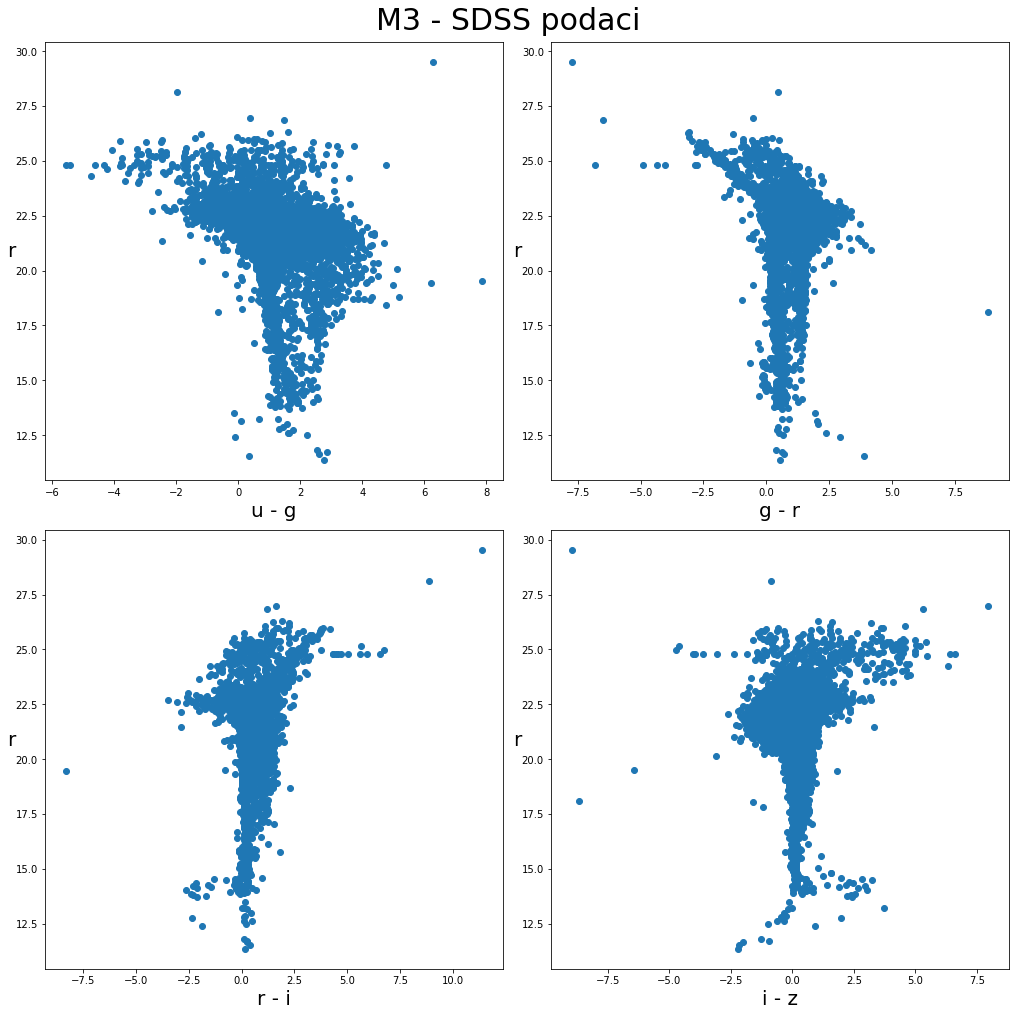

In [38]:
fig = plt.figure(figsize=(14, 14), layout='constrained')
fig.suptitle('M3 - SDSS podaci', fontsize=30)

ax1 = fig.add_subplot(221)
ax1.scatter(Sdf3['u'] - Sdf3['g'], Sdf3['r'])
ax1.set_xlabel('u - g', fontsize=20)
ax1.set_ylabel('r',  fontsize=20, rotation=0)

ax2 = fig.add_subplot(222)
ax2.scatter(Sdf3['g'] - Sdf3['r'], Sdf3['r'])
ax2.set_xlabel('g - r',  fontsize=20)
ax2.set_ylabel('r',  fontsize=20, rotation=0)

ax3 = fig.add_subplot(223)
ax3.scatter(Sdf3['r'] - Sdf3['i'], Sdf3['r'])
ax3.set_xlabel('r - i',  fontsize=20)
ax3.set_ylabel('r',  fontsize=20, rotation=0)

ax4 = fig.add_subplot(224)
ax4.scatter(Sdf3['i'] - Sdf3['z'], Sdf3['r'])
ax4.set_xlabel('i - z',  fontsize=20)
ax4.set_ylabel('r',  fontsize=20, rotation=0)

plt.show()

# GAIA

In [10]:
GQ_M2 = """SELECT gaia_source.source_id, gaia_source.ra, gaia_source.dec, gaia_source.phot_g_mean_mag, gaia_source.phot_bp_mean_mag, gaia_source.phot_rp_mean_mag
FROM gaiadr2.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(323.362583,-0.82325,.0612,3.5100,-2.1600,-3.7200,2000,2015.5)),
		COORD2(EPOCH_PROP_POS(323.362583,-0.82325,.0612,3.5100,-2.1600,-3.7200,2000,2015.5)),
		0.15)
)=1
"""

GQ_M3 = """SELECT gaia_source.source_id, gaia_source.ra, gaia_source.dec, gaia_source.phot_g_mean_mag, gaia_source.phot_bp_mean_mag, gaia_source.phot_rp_mean_mag
FROM gaiadr2.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(205.548417,28.377278,.0245,-.1400,-2.6400,-147.2800,2000,2015.5)),
		COORD2(EPOCH_PROP_POS(205.548417,28.377278,.0245,-.1400,-2.6400,-147.2800,2000,2015.5)),
		0.15)
)=1
"""

In [11]:
Gdf2 = Gaia.launch_job(GQ_M2).get_results().to_pandas()
Gdf3 = Gaia.launch_job(GQ_M3).get_results().to_pandas()

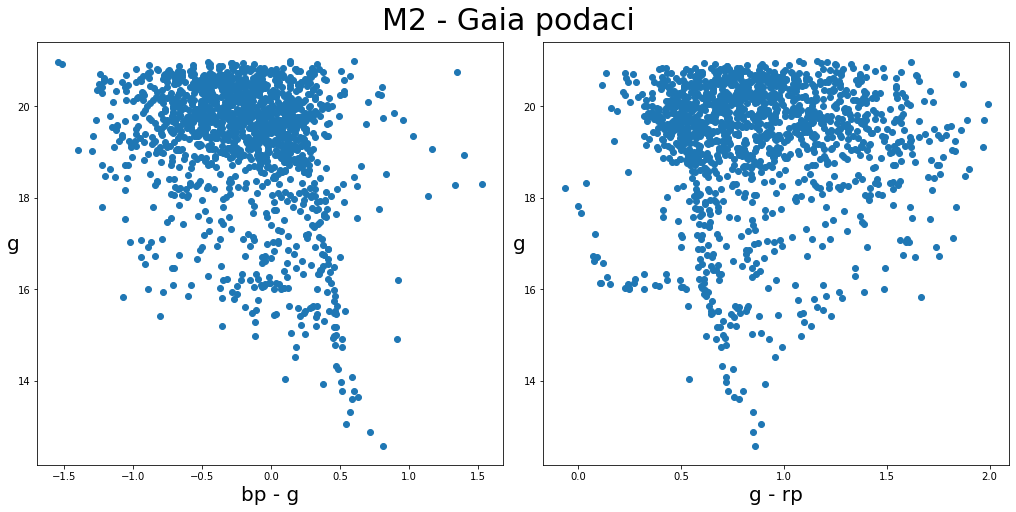

In [37]:
fig = plt.figure(figsize=(14, 7), layout='constrained')
fig.suptitle('M2 - Gaia podaci', fontsize=30)

ax1 = fig.add_subplot(121)
ax1.scatter(Gdf2['phot_bp_mean_mag'] - Gdf2['phot_g_mean_mag'], Gdf2['phot_g_mean_mag'])
ax1.set_xlabel('bp - g', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)

ax2 = fig.add_subplot(122)
ax2.scatter(Gdf2['phot_g_mean_mag'] - Gdf2['phot_rp_mean_mag'], Gdf2['phot_g_mean_mag'])
ax2.set_xlabel('g - rp', fontsize=20)
ax2.set_ylabel('g',  fontsize=20, rotation=0)


plt.show()

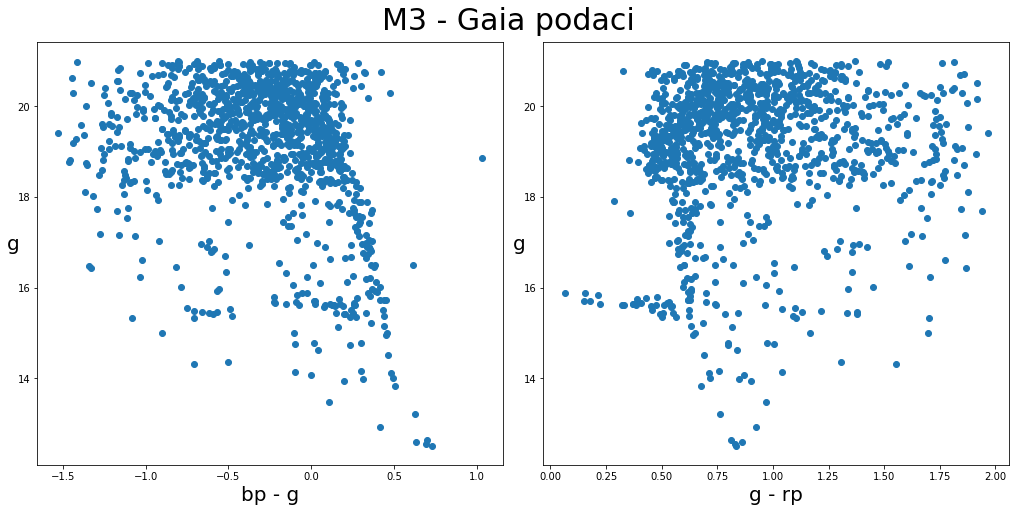

In [36]:
fig = plt.figure(figsize=(14, 7), layout='constrained')
fig.suptitle('M3 - Gaia podaci', fontsize=30)

ax1 = fig.add_subplot(121)
ax1.scatter(Gdf3['phot_bp_mean_mag'] - Gdf3['phot_g_mean_mag'], Gdf3['phot_g_mean_mag'])
ax1.set_xlabel('bp - g', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)

ax2 = fig.add_subplot(122)
ax2.scatter(Gdf3['phot_g_mean_mag'] - Gdf3['phot_rp_mean_mag'], Gdf3['phot_g_mean_mag'])
ax2.set_xlabel('g - rp', fontsize=20)
ax2.set_ylabel('g',  fontsize=20, rotation=0)

plt.show()

# SDSS + Gaia

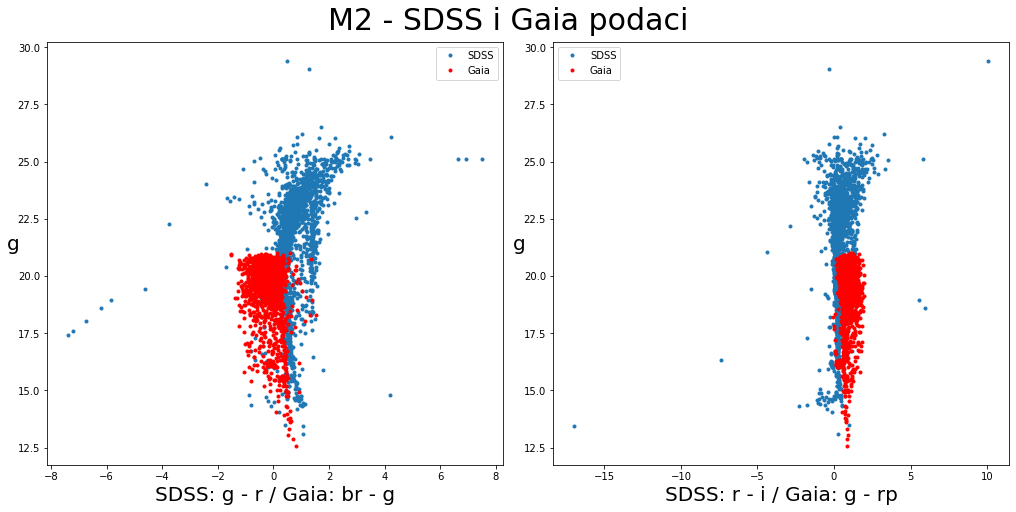

In [35]:
#M2

fig = plt.figure(figsize=(14, 7), layout='constrained')
fig.suptitle('M2 - SDSS i Gaia podaci', fontsize=30)

ax1 = fig.add_subplot(121)
ax1.plot(Sdf2['g'] - Sdf2['r'], Sdf2['g'], '.', label='SDSS')
ax1.plot(Gdf2['phot_bp_mean_mag'] - Gdf2['phot_g_mean_mag'], Gdf2['phot_g_mean_mag'], '.r', label='Gaia')
ax1.set_xlabel('SDSS: g - r / Gaia: br - g', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(Sdf2['r'] - Sdf2['i'], Sdf2['g'], '.', label='SDSS')
ax2.plot(Gdf2['phot_g_mean_mag'] - Gdf2['phot_rp_mean_mag'], Gdf2['phot_g_mean_mag'], '.r', label='Gaia')
ax2.set_xlabel('SDSS: r - i / Gaia: g - rp', fontsize=20)
ax2.set_ylabel('g',  fontsize=20, rotation=0)
ax2.legend()


plt.show()

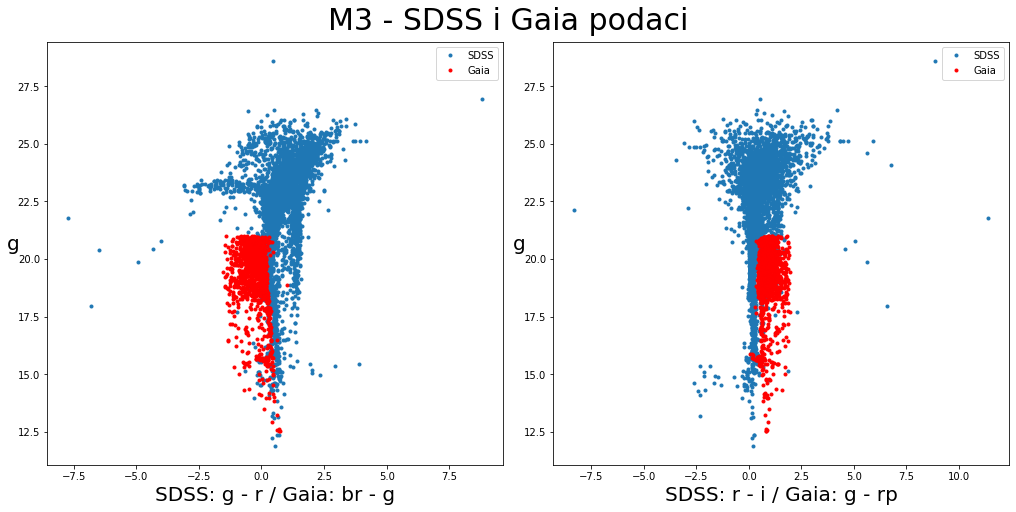

In [34]:
#M3

fig = plt.figure(figsize=(14, 7), layout='constrained')
fig.suptitle('M3 - SDSS i Gaia podaci', fontsize=30)

ax1 = fig.add_subplot(121)
ax1.plot(Sdf3['g'] - Sdf3['r'], Sdf3['g'], '.', label='SDSS')
ax1.plot(Gdf3['phot_bp_mean_mag'] - Gdf3['phot_g_mean_mag'], Gdf3['phot_g_mean_mag'], '.r', label='Gaia')
ax1.set_xlabel('SDSS: g - r / Gaia: br - g', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(Sdf3['r'] - Sdf3['i'], Sdf3['g'], '.', label='SDSS')
ax2.plot(Gdf3['phot_g_mean_mag'] - Gdf3['phot_rp_mean_mag'], Gdf3['phot_g_mean_mag'], '.r', label='Gaia')
ax2.set_xlabel('SDSS: r - i / Gaia: g - rp', fontsize=20)
ax2.set_ylabel('g',  fontsize=20, rotation=0)
ax2.legend()


plt.show()

